**Load images with tf.data**

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
tf.enable_eager_execution()
tf.__version__

'1.14.0'

In [0]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [0]:
import pathlib
data_root_orig = tf.keras.utils.get_file('flower_photos',
                                        'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                        untar=True)
data_root = pathlib.Path(data_root_orig)
print(data_root)

228818944/228813984 [==============================] - 3s 0us/step
/root/.keras/datasets/flower_photos


In [0]:
# test tf.keras.utils.get_file
# print(data_root_orig)

In [0]:
for item in data_root.iterdir():
  print(item)

/root/.keras/datasets/flower_photos/sunflowers
/root/.keras/datasets/flower_photos/LICENSE.txt
/root/.keras/datasets/flower_photos/roses
/root/.keras/datasets/flower_photos/daisy
/root/.keras/datasets/flower_photos/dandelion
/root/.keras/datasets/flower_photos/tulips


In [0]:
import random
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)

image_count = len(all_image_paths)
print(image_count)

3670


In [0]:
all_image_paths[:10]

['/root/.keras/datasets/flower_photos/sunflowers/8041242566_752def876e_n.jpg',
 '/root/.keras/datasets/flower_photos/sunflowers/4746643626_02b2d056a2_n.jpg',
 '/root/.keras/datasets/flower_photos/sunflowers/20183028616_beb937e75c_m.jpg',
 '/root/.keras/datasets/flower_photos/tulips/8511683706_4173683d45_m.jpg',
 '/root/.keras/datasets/flower_photos/dandelion/14761980161_2d6dbaa4bb_m.jpg',
 '/root/.keras/datasets/flower_photos/daisy/1955336401_fbb206d6ef_n.jpg',
 '/root/.keras/datasets/flower_photos/dandelion/3505026222_c760df0035_n.jpg',
 '/root/.keras/datasets/flower_photos/roses/2973256732_1926295f35.jpg',
 '/root/.keras/datasets/flower_photos/sunflowers/15460162172_014bcce403.jpg',
 '/root/.keras/datasets/flower_photos/sunflowers/6140808687_88df0fd733.jpg']

In [0]:
import os
attributions = (data_root/'LICENSE.txt').open(encoding='utf-8').readlines()[4:]
attributions = [line.split(' CC-BY') for line in attributions]
attributions = dict(attributions)

In [0]:
import IPython.display as display

def caption_image(image_path):
  image_rel = pathlib.Path(image_path).relative_to(data_root)
  return "Image (CC BY 2.0) " + " - ".join(attributions[str(image_rel)].split(' - ')[:-1])

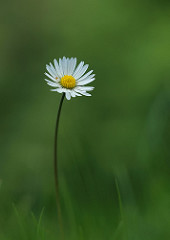

Image (CC BY 2.0)  by orestART



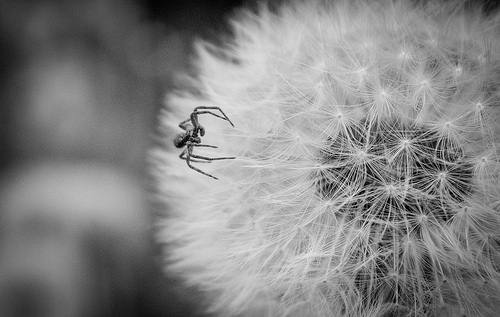

Image (CC BY 2.0)  by Holly Victoria Norval



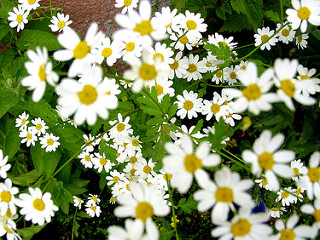

Image (CC BY 2.0)  by Vladimer Shioshvili



In [0]:
for n in range(3):
  image_path = random.choice(all_image_paths)
  display.display(display.Image(image_path))
  print(caption_image(image_path))
  print()

In [0]:
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
print(label_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [0]:
label_to_index = dict((name, index) for index, name in enumerate(label_names))
print(label_to_index)

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}


In [0]:
all_image_labels = [label_to_index[pathlib.Path(path).parent.name] for path in all_image_paths]
print("First 10 labels indices: ", all_image_labels[:10])

First 10 labels indices:  [3, 3, 3, 4, 1, 0, 1, 2, 3, 3]


In [0]:
img_path = all_image_paths[0]
img_path

'/root/.keras/datasets/flower_photos/sunflowers/8041242566_752def876e_n.jpg'

In [0]:
img_raw = tf.io.read_file(img_path)
print(repr(img_raw)[:100]+"...")

<tf.Tensor: id=1, shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x...


In [0]:
img_tensor = tf.image.decode_image(img_raw)
print(img_tensor.shape)
print(img_tensor.dtype)

(227, 320, 3)
<dtype: 'uint8'>


In [0]:
img_final = tf.image.resize(img_tensor, [192, 192])
img_final = img_final/255.0
print(img_final.shape)
print(img_final.numpy().min())
print(img_final.numpy().max())

(192, 192, 3)
0.0
1.0


In [0]:
def preprocess_image(image):
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [192, 192])
  image /= 255.0

  return image

In [0]:
def load_and_preprocess_image(path):
  image = tf.read_file(path)
  return preprocess_image(image)

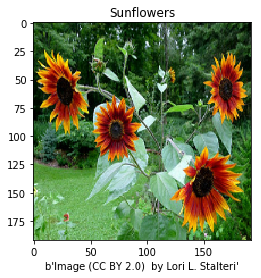

In [0]:
import matplotlib.pyplot as plt

img_path = all_image_paths[0]
label = all_image_labels[0]

plt.imshow(load_and_preprocess_image(img_path))
plt.grid(False)
plt.xlabel(caption_image(img_path).encode('utf-8'))
plt.title(label_names[label].title())
print()

In [0]:
path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)

In [0]:
print('shape: ', repr(path_ds.output_shapes))
print('type: ', path_ds.output_types)
print()
print(path_ds)

Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.
shape:  TensorShape([])
Instructions for updating:
Use `tf.compat.v1.data.get_output_types(dataset)`.
type:  <dtype: 'string'>

<DatasetV1Adapter shapes: (), types: tf.string>


In [0]:
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)

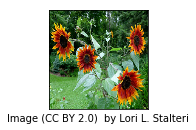

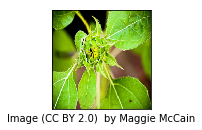

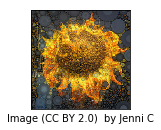

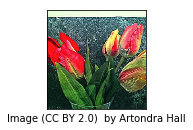

In [36]:
import matplotlib.pyplot as plt
for n,image in enumerate(image_ds.take(4)):
  plt.subplot(2,2,n+1)
  plt.imshow(image)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(caption_image(all_image_paths[n]))
  plt.show()

In [0]:
label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(all_image_labels, tf.int64))

In [38]:
for label in label_ds.take(10):
  print(label_names[label.numpy()])

sunflowers
sunflowers
sunflowers
tulips
dandelion
daisy
dandelion
roses
sunflowers
sunflowers


In [0]:
image_label_ds = tf.data.Dataset.zip((image_ds, label_ds))

In [40]:
print(image_label_ds)

<DatasetV1Adapter shapes: ((192, 192, 3), ()), types: (tf.float32, tf.int64)>


In [41]:
ds = tf.data.Dataset.from_tensor_slices((all_image_paths, all_image_labels))

def load_and_preprocess_from_path_label(path, label):
  return load_and_preprocess_image(path), label

image_label_ds = ds.map(load_and_preprocess_from_path_label)
image_label_ds

<DatasetV1Adapter shapes: ((192, 192, 3), ()), types: (tf.float32, tf.int32)>

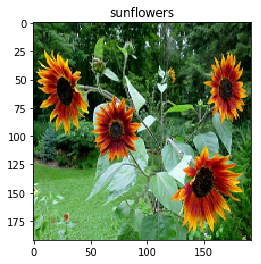

In [44]:
for temp_ds in image_label_ds.take(1):
  temp_image = temp_ds[0]
  temp_label = temp_ds[1]
  plt.imshow(temp_image)
  plt.title(label_names[temp_label.numpy()])
  plt.show()